## <center> &#x1F985; An introduction to Value At Risk &#x1F985; </center>

The goal of this notebook is to introduce the notion of *Value At Risk* in a self-contained and compact way. 
The chosen approach is more oriented to applications, reducing the mathematical machinery to the minimum.
The intuitive meaning of the involved operations is pointed out and examples with commented code offered at the end. 
We recommend the book *[Stochastic Finance](https://www.degruyter.com/document/doi/10.1515/9783110212075/html?lang=de)* to extend the content here provided.

### &#x1F331; Motivation

Let $X$ be a random variable describing our financial position,
so that **higher values** of $X$ represent **convenient** outcomes.
When modeling the *risk associated to* $X$,
a quick description is generally offered by the standard variation $\sigma(X)$, 
since it determines how far the samples can differ from their average ([Chebyshev inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality)).

When we focus on *financial* risk, this notion reveals its limitations:
 we have indeed a greater interest in avoiding relevant *losses*, 
*unfavorable* outcomes, while the variance does not differentiate
between "positive" or "negative" events
(due to its squared difference in the definition).

### &#x1F333; Monetary Risk Measures: the general theory

When investigating the risk associated to a financial position $X$,
it is not possible to find an "universal" answer,
but rather multiple strategies with different advantages and disadvantages.
A possible approach is given by relying on *monetary risk measures*,
family of functions characterized by the idea of quantifying risk in terms of
amount of **money needed to balance** unfavorable events.

From a mathematical perspective, a monetary risk measure is a map
$\rho :  \mathbb{R} \to \mathbb{R}$ satisfying the following three properties:

- *risk minimization*: lower values of $\rho(X)$ indicate
        more "convenient" scenarios;
 - *monotonicity*: for two random variables $X$ and $Y$, if $X \leq Y$ a.s., then $\rho(Y) \leq \rho(X)$;
 - *cash-invariance*: for each $m \in \mathbb{R}$, we have 
        $\rho(X + m) = \rho(X) - m$;

If the financial position $Y$ always ensures
a better gain than $X$, then the risk of $Y$ must be lower (monotonicity).
If we keep some additional money $m$ at
disposal when getting a position $X$, the overall risk would reduce since that
capital could be used as a form of protection against negative outcomes (cash-invariance).

A position $X$ is defined to be (mathematically) **acceptable** if and only if $\rho(X) \leq 0$, **interpreting**
then the risk $\rho(X)$ as the smallest amount of money that,
when added to the position $X$, makes this position acceptable.

The Value At Risk (introduced below) it is one of the simplest possible monetary risk measure.
Since it is based on the idea of quantile, we start by quickly revising this notion.

### &#x1F334; Quantiles of a random variable

Let $X$ be a real random variable.
The cumulative distribution function 
$F_X: \mathbb{R} \to [0,1]$
of $X$ is defined as $F_X(k) = P[X \leq k ]$.
The map above is always non-decreasing 
and continuous from the right,
but for simplicity we assume strict monotonicity and full continuity.
This allows us to define the **quantile function** simply as the inverse map
$Q_X: [0,1] \to \mathbb{R}$, with $Q_X(p) = F^{-1}(p) = k$, 
being $k$ the only value such that $P[X \leq k] = p$.

The picture below can help in enforcing the intuition beyond the notion of quantile:
if we look at the density of the distribution $X$ (informally, the plot associating to
each value $k \in \mathbb{R}$ the probability $P[X = k]$),
the number $Q_X(0.6)$ is the value on the x-axis such that the blue area on the left covers $60\%$ of the probability:

![title](quantile.png)

It is important to remark the following properties:
 - $P[X \leq Q_X(p)] = p$ for each $p \in [0,1]$;
 - for every $m \in \mathbb{R}$ and
      $p \in [0,1]$, we have $Q_{X+m}(p) = Q_{X}(p) + m$;
 - if $X \leq Y$, then $Q_X \leq Q_Y$.

When the cumulative function is not continuous (e.g. for discrete variables),
the quantile can be defined in a similar way and the properties above still hold.

### &#x1F34E; Value At Risk

For a financial position $X$, the *Value At Risk* is the map
$V_@R(X): [0, 1] \to \mathbb{R}$
defined as:

<center> $V_@R_\lambda(X) = - Q_X(\lambda)$, for a level of tolerance $\lambda \in [0,1]$ </center>

#### &#x1F34E;&#x1F34E; Interpretation
The choice of the quantity $\lambda$ is of extreme importance: the smaller,
the safer we choose to be, at the expense of the need of having more money at disposal
to cover emergency situations.
A common value is $\lambda = 0.05$, meaning that **we bet to stay in the** realm of events
happening with statistical **probability of $95\%$**:
we have enough money to cover all possible losses here, but if an event happens
outside this range, we may face a relevant loss.
This interpretation follows by the definition, since:
$P [ X + V_@R_\lambda(X) \leq 0] =
P [ X \leq Q_X(\lambda) ] = \lambda$.


In other words, if we invest in $X$ and have $V_@R_\lambda(X)$ money
at disposal to cover possible failures, the probability of facing anyway a loss (i.e. getting negative values
despite adding this extra deposit of money) is given by $\lambda$.

In conclusion, for a fixed probability $\lambda$, the lower the Value At Risk is, the less money we need to cover unexpected situations,
the "safer" we are.

#### &#x1F34E;&#x1F34E; Monotonicity and Cash-Invariance

The Value At Risk is a monetary risk measure:
if $X \leq Y$ we have $Q(X) \leq Q(Y)$ and therefore $V_@R(X) \geq V_@R(Y)$.
The cash-invariance property follows from the quantile translational invariance:
$V_@R_\lambda(X + k) =
        - Q_{(X + k)}(\lambda) = 
        - Q_X(\lambda) - k =
        V_@R_\lambda(X) - k
$.

#### &#x1F34E;&#x1F34E; Computation

When working with stock values in time $X_n$ a common idea is to convert them into 
*fractional returns* $F_n$ defined as the unique number satisfying the equation
$X_n = X_{n-1} + F_n X_{n-1}$.
For instance, a value of $0.10$ would for mean that the current price is $10\%$ higher than the previous.
This procedure is a form of data preprocessing and does not generally bring any disadvantage.

On the other hand, a common **assumption** is to see the whole historical series $F_n$
as a set of samples always coming from the same **fixed** random variable $F$. If on the one hand
this is of course something naive and unrealistic,
on the other hand it can be useful to perform some simple first estimation.
This is the approach chosen in the code below, where we compute the Value At Risk from the
historical returns of the DAX index.

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
from math import floor
import matplotlib.pyplot as plt

#### STEP 1: get historical data using the yahoo finance interface
stock_data = yf.download("DAX", start="2020-01-01", end="2024-07-01")

[*********************100%%**********************]  1 of 1 completed


In [9]:
#### STEP 2:
# choose the adjusted closed value for each day,
# transform the series into fractional returns
# (this is done when using .pct_change())
stock_data["Daily_Return"] = stock_data["Adj Close"].pct_change()

In [10]:
#### STEP 3:
# define your set of return samples by removing invalid values
# Remember: we are *assuming* them to be come from the same fixed random variable
samples = stock_data["Daily_Return"].dropna()

In [11]:
#### STEP 4:
# Compute the Value At Risk by looking at the samples quantile.
# Here is where the assumption of having samples froming from the same
# random variable F comes into play.
# Otherwise, this computation would be meaningless.
lambda_level_in_percent = 5
var = - np.percentile(samples, lambda_level_in_percent)
print(f"V@R: {var:.2f}")
print("(the lower, the better)")

V@R: 0.02
(the lower, the better)


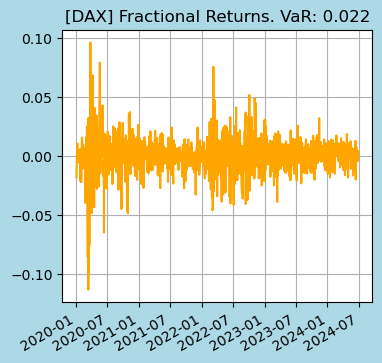

In [13]:
#### STEP 5: plotting the results
fig, ax = plt.subplots(facecolor='lightblue', figsize=(4,4))
ax.plot(samples, color = "orange")
ax.grid()
plt.title(f"[DAX] Fractional Returns. VaR: {var:.3f}")
fig.autofmt_xdate()
plt.show()

The previous example shows a Value At Risk equals to $0.028$. Since the analysis has been conducted on daily data,
the interpretation is the following: if we invest today $100$ € in DAX index, it is recommended to leave 
some extra $2.20$ € in deposit: with $95\%$ of probability they will be enough to cover possible losses.

### &#x1F34A; Conclusions

*Values At Risk* represents a way to estimate the risk of financial positions on the base of
their quantiles. To compute quantiles, the choice of a model for the financial position is needed,
which is in itself a challenging task.
One common strategy is to simply use historical values as they were identically distributed:
despite being a conceptual mistake, it can be useful for a first analysis and to acquire familiarity with data.

*Values At Risk* belongs to the mathematical family of Monetary Risk Measures,
and more general (and sophisticated) variants are available in the literature.